# -------------------------> Health Insurance Claims <-------------------------

🙌Cashless Claim: The policyholder gets treatment at a hospital within the insurance network without paying upfront. 
    The hospital coordinates with the insurer to get pre-authorization and directly settles eligible bills with the insurer.

🎃Reimbursement Claim: The policyholder pays for the medical expenses initially and later submits a claim with all required documents
(medical bills, prescriptions, discharge summaries) to the insurer for reimbursement.

🍂The project would typically cover the workflow of:

Notifying the insurer of planned or emergency hospital admissions.

Submitting pre-authorization or claim forms and supporting medical documents.

Claim verification by the insurer.

Approval and settlement of eligible claims amount.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("✅ Libraries Imported Successfully!")

✅ Libraries Imported Successfully!


# Load Dataset

In [6]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Look at Data

In [8]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1338, 7)


In [9]:
print( "\nData Types:\n",df.dtypes)


Data Types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [37]:
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [38]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [39]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [41]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [42]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [43]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
(df.isnull().sum()/len (df))*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# Categorical Columns

In [22]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")



Value Counts for sex:
sex
male      676
female    662
Name: count, dtype: int64

Value Counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Value Counts for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


# 🧹Checking outliers 

# removal 

In [24]:
df_step1 = df.copy()
for col in num_cols:
    Q1 = df_step1[col].quantile(0.25)
    Q3 = df_step1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    before_count = len(df_step1)
    df_step1 = df_step1[(df_step1[col] >= lower) & (df_step1[col] <= upper)]
    after_count = len(df_step1)
    removed = before_count - after_count
    print(f"\n✓ {col}: Removed {removed} outliers")

print(f"\nAfter Outlier Removal:")
print(f"   Original: {len(df):,} rows")
print(f"   ⚙️Cleaned: {len(df_step1):,} rows")
print(f"   🗑️Removed: {len(df) - len(df_step1):,} rows ({(len(df) - len(df_step1))/len(df)*100:.2f}%)")


✓ age: Removed 0 outliers

✓ bmi: Removed 9 outliers

✓ children: Removed 0 outliers

✓ charges: Removed 138 outliers

After Outlier Removal:
   Original: 1,338 rows
   ⚙️Cleaned: 1,191 rows
   🗑️Removed: 147 rows (10.99%)


# cleaned data `

In [25]:
df.to_csv('cleaned_data.csv', index=False)

print("Dataset cleaned and saved!")
print(df.head())

Dataset cleaned and saved!
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# boxplot

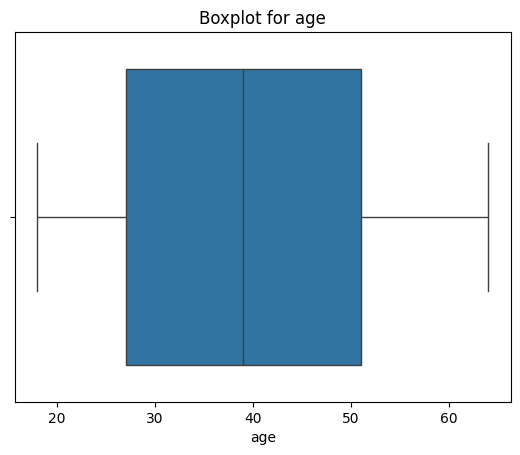

<Figure size 300x300 with 0 Axes>

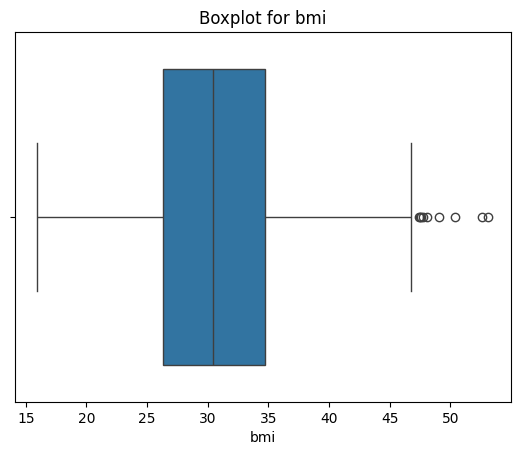

<Figure size 300x300 with 0 Axes>

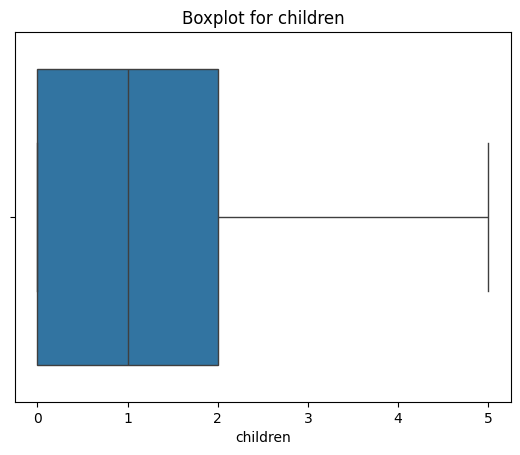

<Figure size 300x300 with 0 Axes>

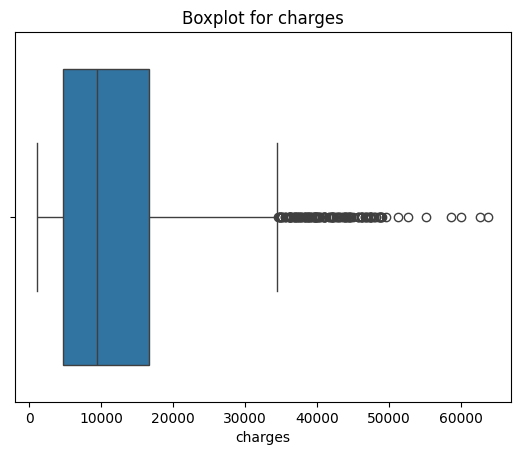

<Figure size 300x300 with 0 Axes>

In [ ]:
num_cols = df.select_dtypes(include='number').columns.tolist()
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.figure(figsize=(3,3))
    plt.show()

# Univariate analysis 

# cleaning the outliers in plots 

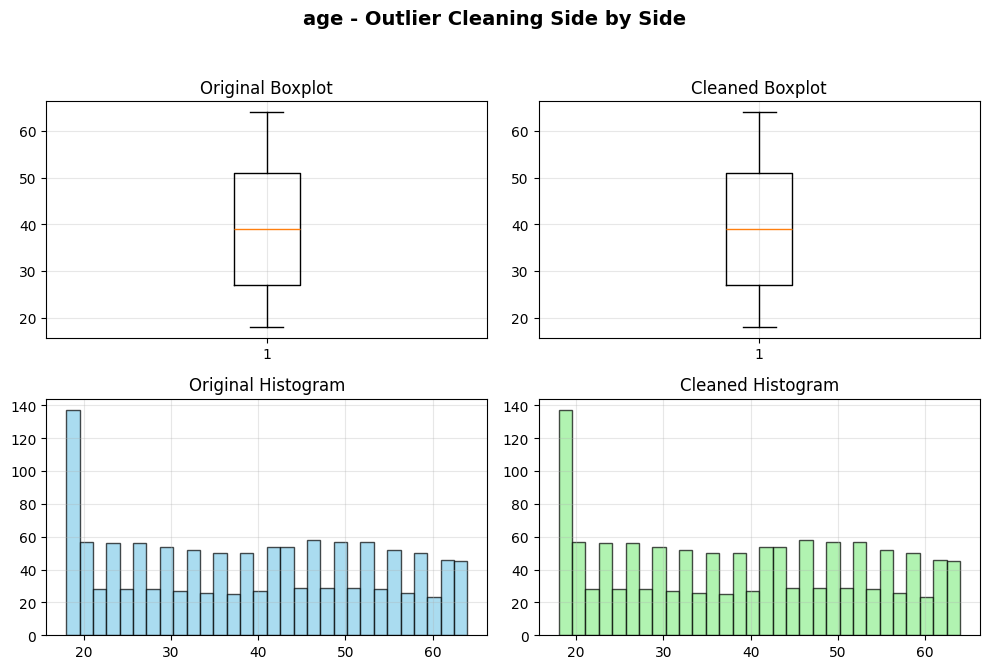

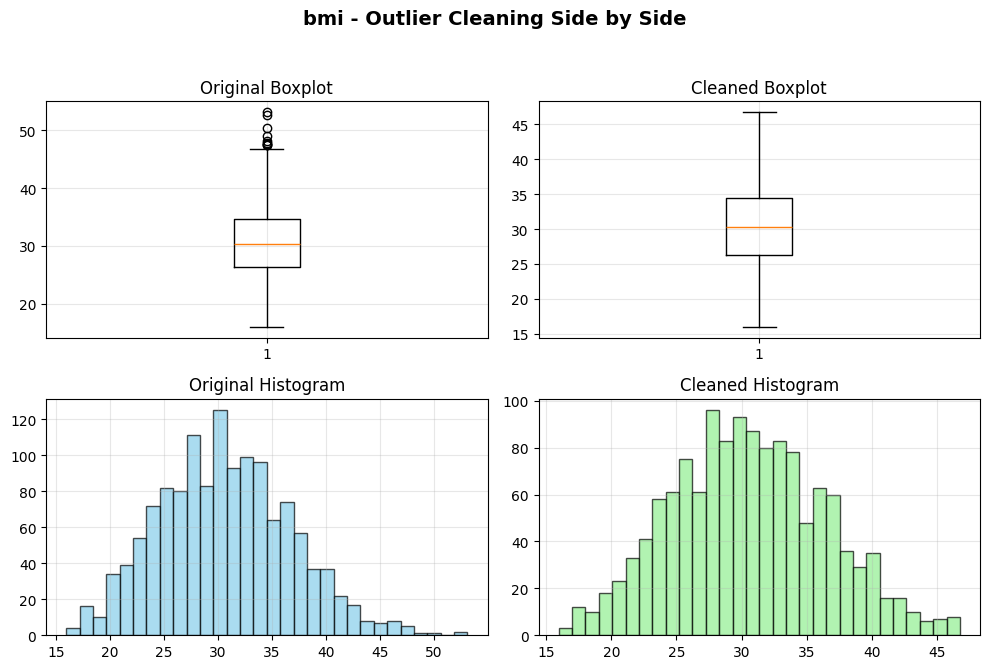

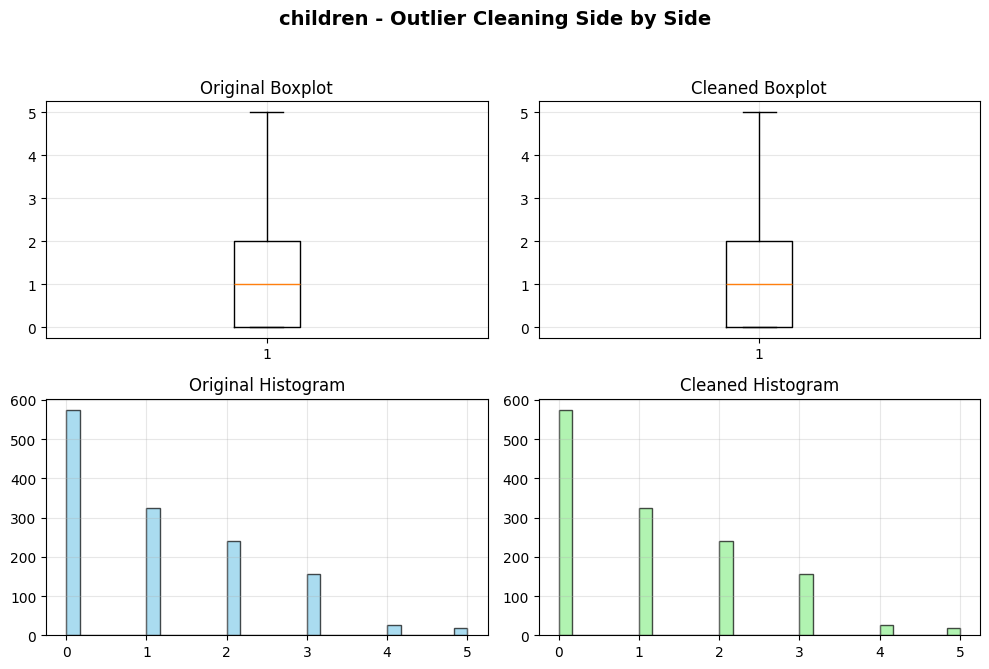

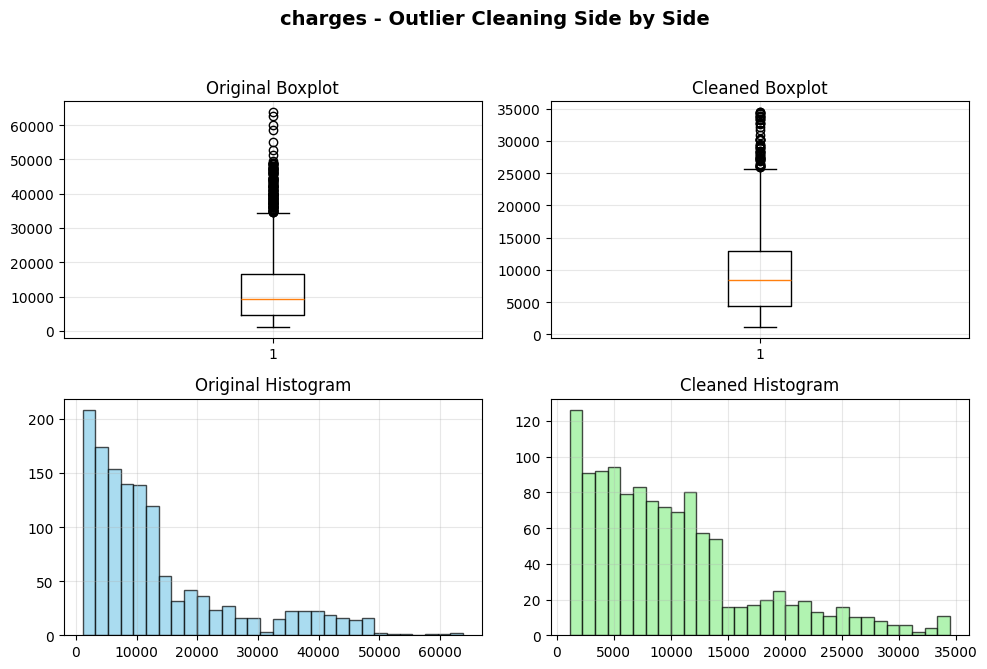

In [ ]:
# Function to remove outliers using IQR for a given Series
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series >= lower) & (series <= upper)]

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    cleaned_col = remove_outliers(df[col])

    fig, axes = plt.subplots(2, 2, figsize=(10, 7))
    fig.suptitle(f'{col} - Outlier Cleaning Side by Side', fontsize=14, fontweight='bold')

    # Boxplots
    axes[0, 0].boxplot(df[col])
    axes[0, 0].set_title('Original Boxplot')
    axes[0, 1].boxplot(cleaned_col)
    axes[0, 1].set_title('Cleaned Boxplot')

    # Histograms
    axes[1, 0].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1, 0].set_title('Original Histogram')
    axes[1, 1].hist(cleaned_col, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Cleaned Histogram')

    for ax in axes.flat:
        ax.grid(alpha=0.3)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### Visualize Numerical Distribution

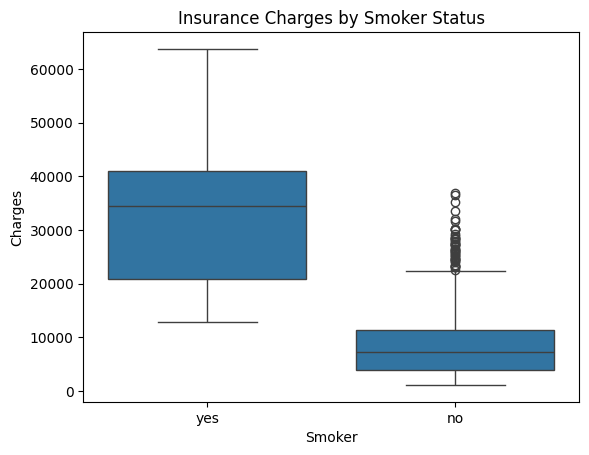

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of charges grouped by smoker status
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


The median and the whole range of charges for smokers is far higher than for non-smokers.

Smokers’ boxplot often shows not only higher median but also more extreme outliers (super-high charges).

# hist plot

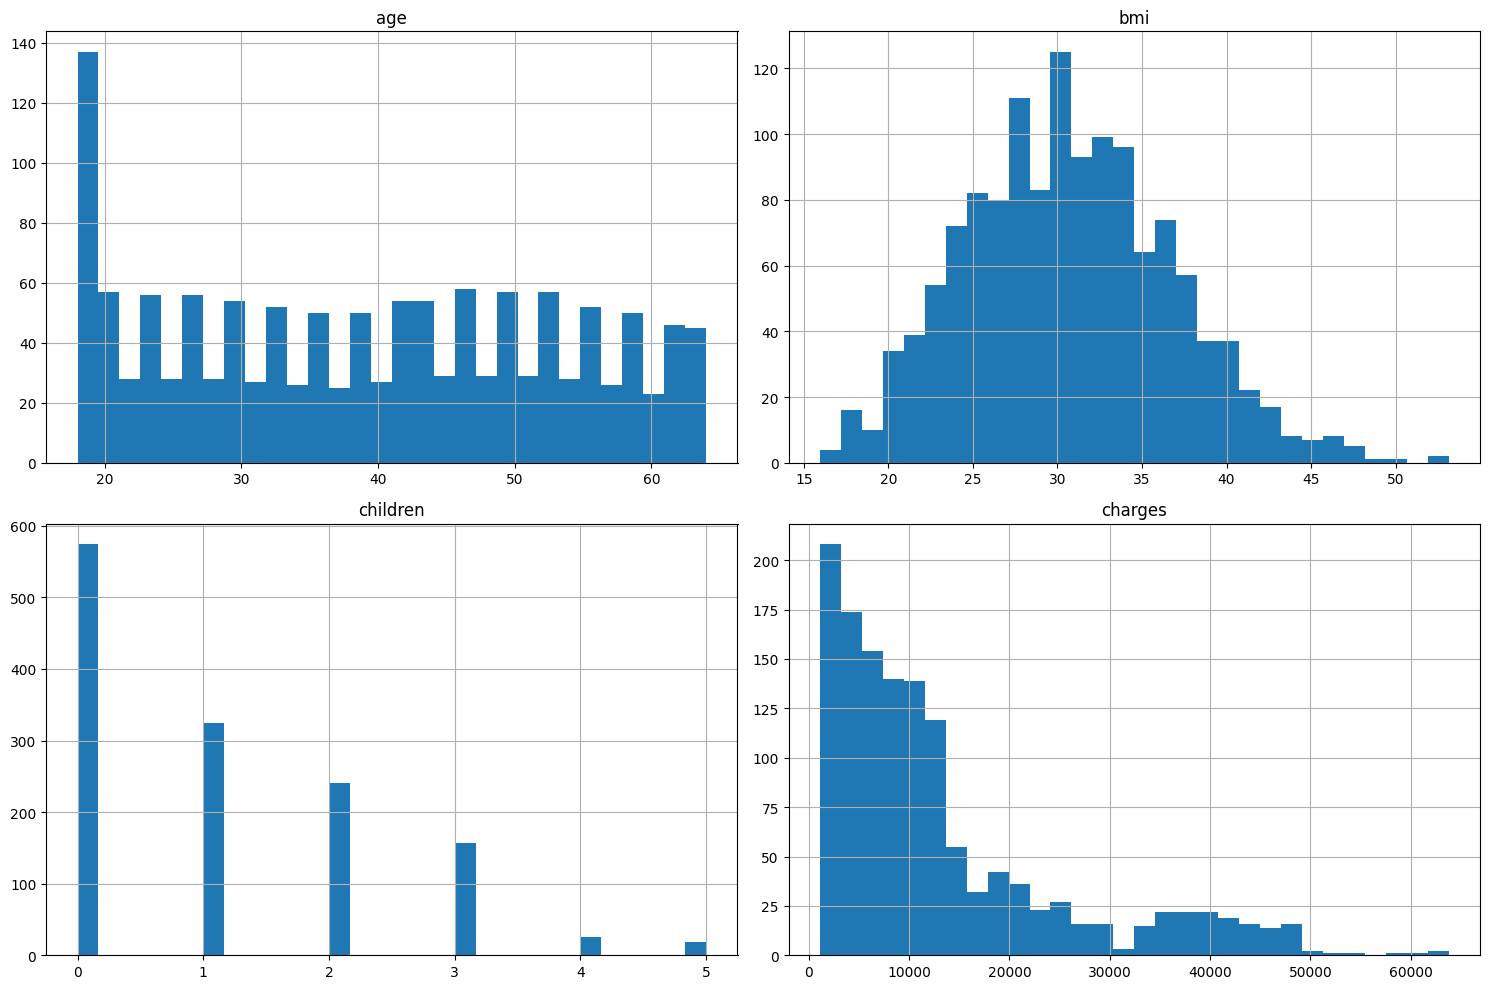

In [14]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

⚡The insurance dataset mainly covers younger adults, but includes some customers up to 60+ years.

⚡Many customers have BMI above 30 (category: overweight to obese), which might raise insurance costs.

⚡ Large families are uncommon among insured customers.

⚡A few cases show exceptionally high healthcare spending.

* 🙌 Age: Most customers are young adults, with fewer in the older age groups.
*🙌 BMI: BMI values are spread out, but most people have BMI in the normal-to-high range (20-40).
* 🙌 Children: Majority of policyholders have 0–2 children; very few have 4 or more.
* 👍 Charges: Most claims are low, but some policyholders have very high insurance charges (right-skewed).

### Visualize  Categorical Distributions

# countplot

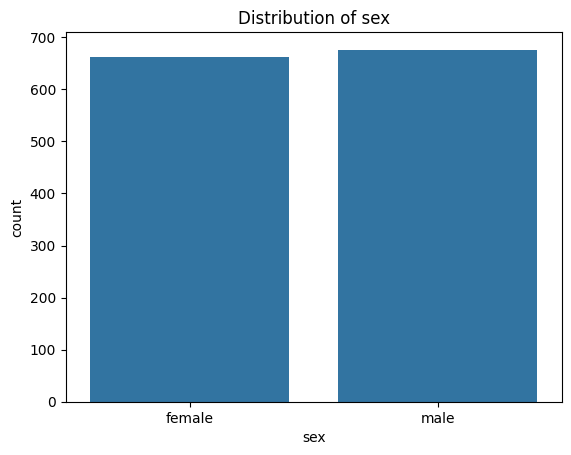

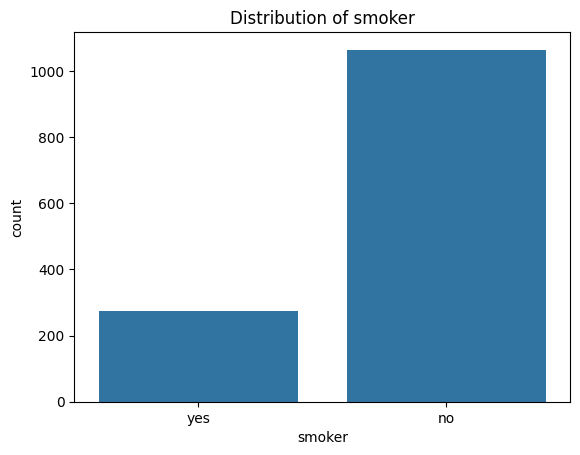

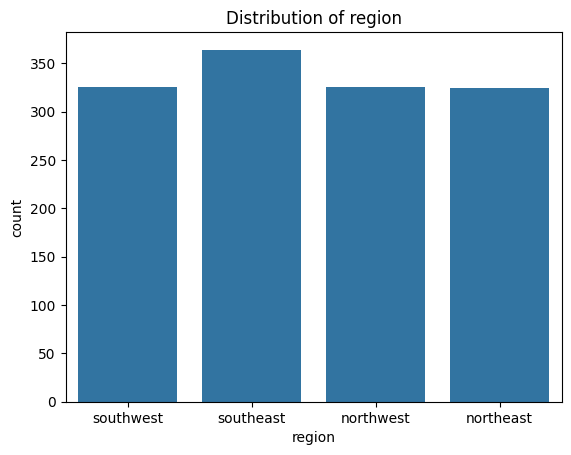

In [36]:
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')

    plt.show()

⚡ Insurance customers are almost evenly split by gender.

⚡Most people in the dataset do not smoke, which could impact average insurance charges.

⚡Data is geographically well-distributed; analysis will fairly represent all regions.

Sex: The dataset is balanced with similar numbers of male and female policyholders.

Smoker: Non-smokers greatly outnumber smokers in this dataset.

Region: The number of policyholders is similar across all regions.

# bivariate analysis 

# Correlation Matrix and 🔥 Heatmap

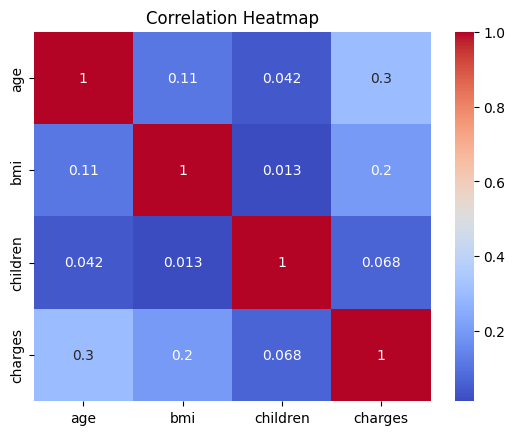

In [35]:

numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


⚡ Age is the main factor linked to higher insurance charges, followed by BMI. Number of children barely affects costs.


# key patterns 

* Age and charges: moderate positive (older = higher charges)

* BMI and charges: slight positive

* Children and charges: very weak

* Other correlations are low

Both males and females have more non-smokers than smokers, but the gap may differ slightly by gender.


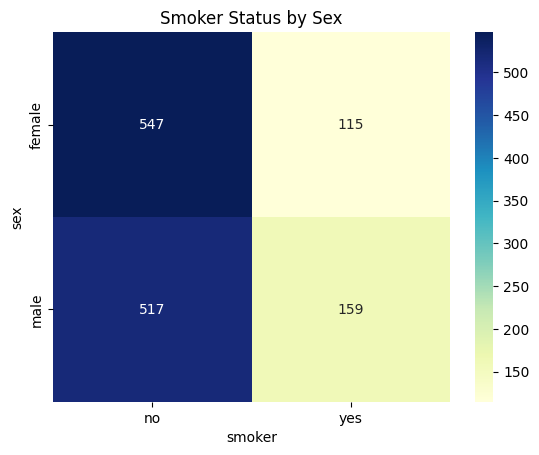

In [28]:
heatmap_data = pd.crosstab(df['sex'], df['smoker'])
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Smoker Status by Sex")
print('Both males and females have more non-smokers than smokers, but the gap may differ slightly by gender.')

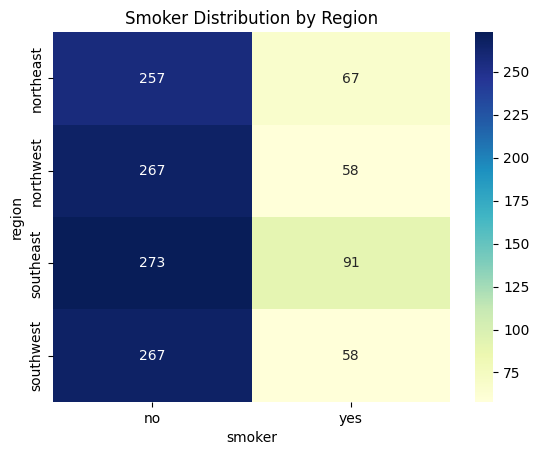

Categorical heatmaps spotlight unique combinations, revealing who faces the highest risk or cost.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grouped = pd.crosstab(df['region'], df['smoker'])
sns.heatmap(grouped, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Smoker Distribution by Region')
plt.show()
print("Categorical heatmaps spotlight unique combinations, revealing who faces the highest risk or cost.")

In [48]:
pd.crosstab(df['smoker'], df['region'])


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


# Bar plot

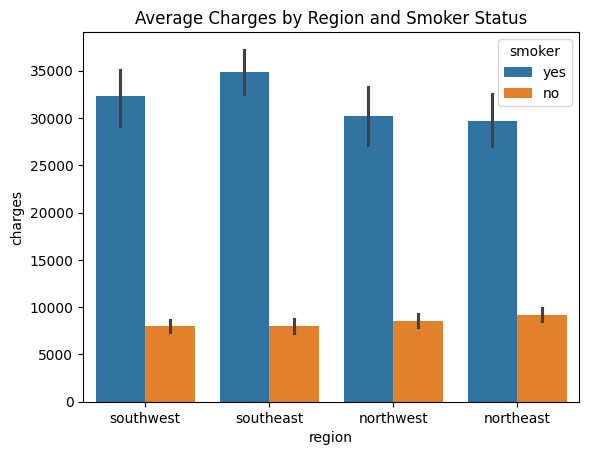

Grouped barplots highlight differences across population groups, guiding targeted health interventions.


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='region', y='charges', hue='smoker', data=df)
plt.title('Average Charges by Region and Smoker Status')
plt.show()
print("Grouped barplots highlight differences across population groups, guiding targeted health interventions.")

<Axes: xlabel='smoker', ylabel='charges'>

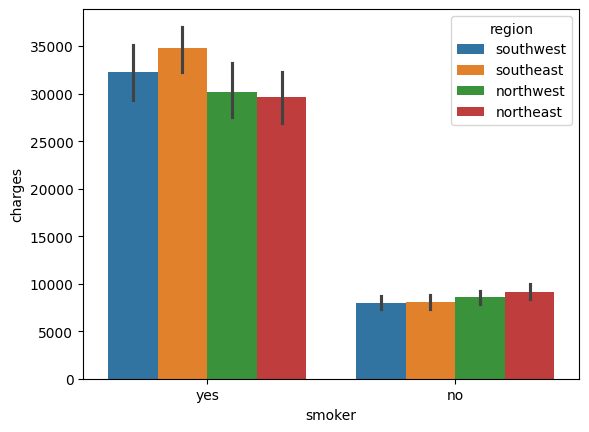

In [11]:
sns.barplot(x='smoker', y='charges', hue='region', data=df)

# Pairplot 

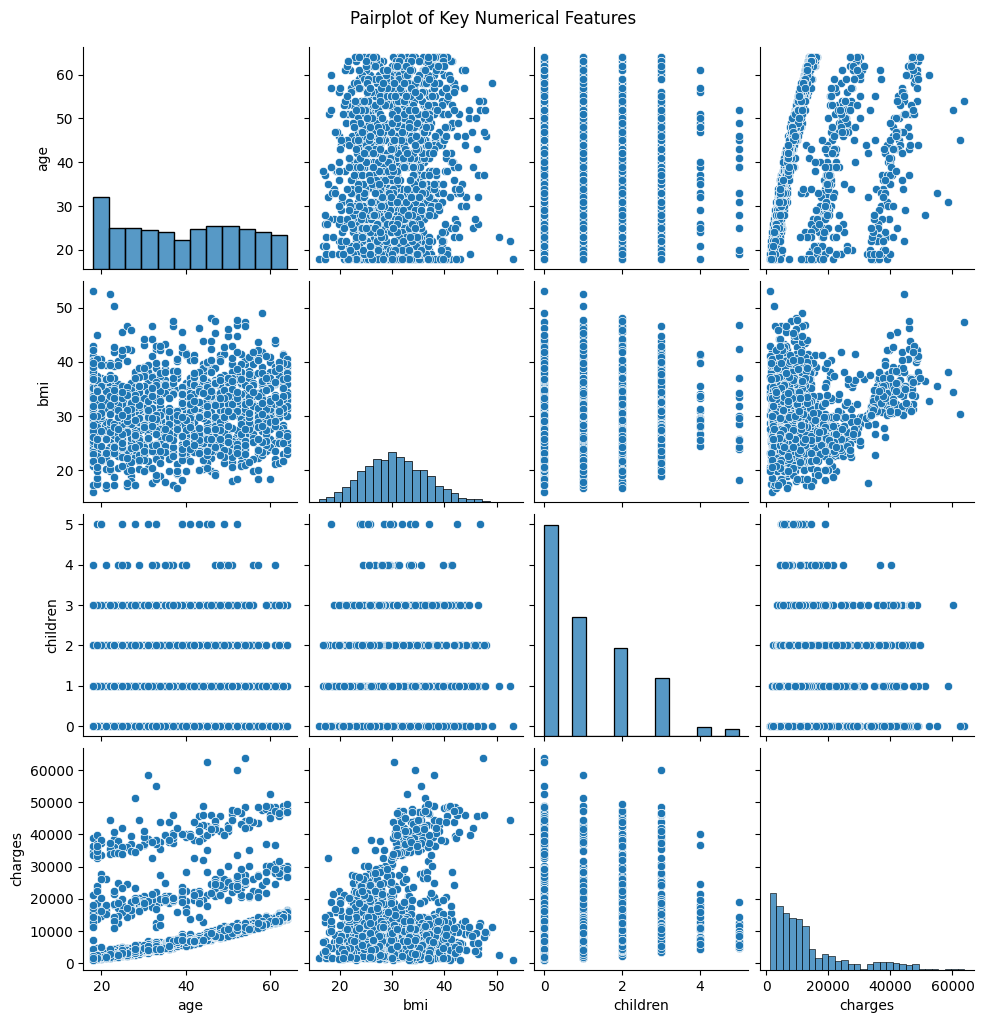

<Figure size 200x400 with 0 Axes>

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = ['age', 'bmi', 'children', 'charges']

# Basic pairplot
sns.pairplot(df[num_cols])
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.figure(figsize=(2,4))
plt.show()


⚡Older and heavier people tend to pay higher charges. Number of children has little effect on cost.

# key patterns 

* Charges increase with age and BMI.

* No strong pattern between children and charges.

* Several clusters are visible, showing relationships between age, BMI, and charges.

#  📊Pie chart for 'region'

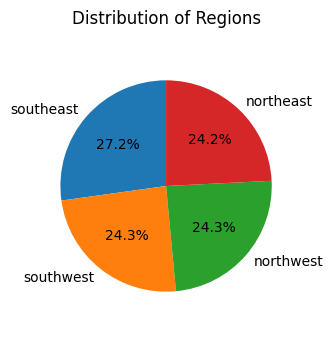

In [23]:

labels = df['region'].value_counts().index
sizes = df['region'].value_counts().values
plt.figure(figsize=(3,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Regions')
plt.axis('equal')
plt.show()


🔵 Most policyholders are non-smokers.
🔵 Regions are fairly evenly represented.


# 📈KDE plot of 'charges' column

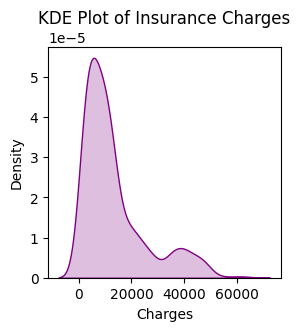

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(3,3))
sns.kdeplot(df['charges'], shade=True, color="purple")
plt.title('KDE Plot of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.show()


✨ Insight: The KDE plot shows the probability density of insurance charges, with the peak showing where most charges are concentrated.

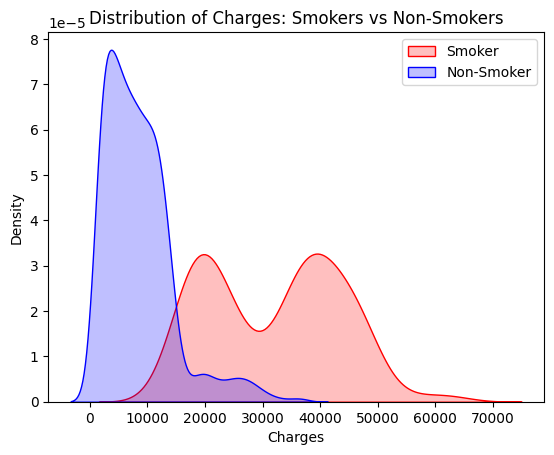

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE Plot of charges for smokers and non-smokers
sns.kdeplot(data=df[df['smoker']=='yes']['charges'], label='Smoker', shade=True, color='red')
sns.kdeplot(data=df[df['smoker']=='no']['charges'], label='Non-Smoker', shade=True, color='blue')
plt.title('Distribution of Charges: Smokers vs Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


The smoker curve is shifted far to the right, meaning they’re much more likely to pay high charges.

The peak for non-smokers is at lower charges—most pay less.

There is almost no overlap in the high-charge region; those paying the most are almost exclusively smokers.

# 🎻Violin plot: Charges by Smoker status

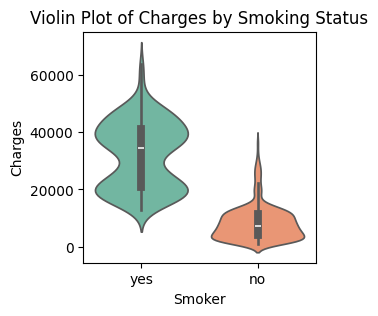

In [26]:

plt.figure(figsize=(3,3))
sns.violinplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Violin Plot of Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


💡Insight: The violin plot compares distributions (including medians and outliers) between smokers and non-smokers. Smokers, on average, have much higher charges, and their distribution is wider.



# Scatter plot

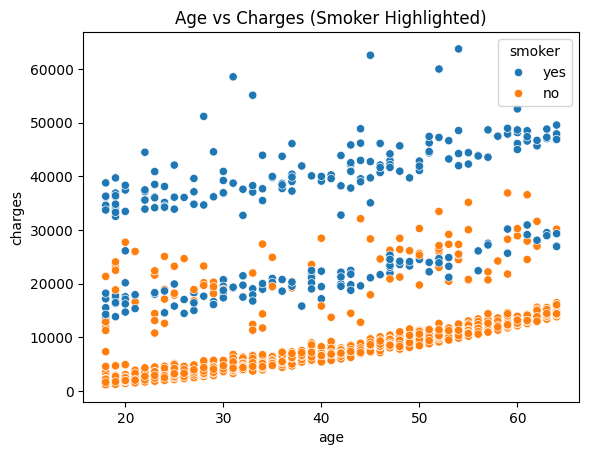

✔️ Charges generally increase as people age, especially for smokers, who pay much higher charges at older ages.


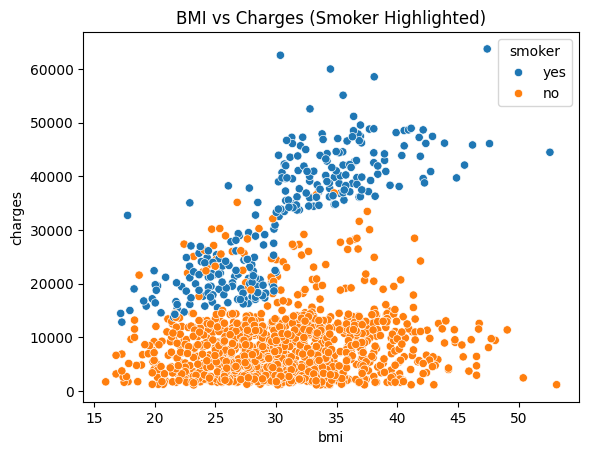

✔️ People with higher BMI tend to have higher charges; again, smoking increases charges at almost any BMI.


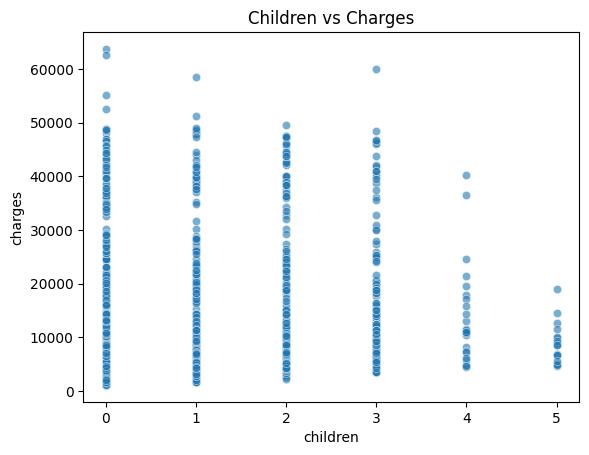

✔️ the number of children does not have a strong effect on charges.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age vs Charges
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges (Smoker Highlighted)')
plt.show()

print("✔️ Charges generally increase as people age, especially for smokers, who pay much higher charges at older ages.")

# BMI vs Charges
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges (Smoker Highlighted)')
plt.show()
print("✔️ People with higher BMI tend to have higher charges; again, smoking increases charges at almost any BMI.")

# Children vs Charges
sns.scatterplot(data=df, x='children', y='charges', alpha=0.6)
plt.title('Children vs Charges')
plt.show()
print("✔️ the number of children does not have a strong effect on charges.")

In [56]:
# Charges by Smoker Status
print(df.groupby('smoker')['charges'].mean())


print("✔️ Smokers pay much more on average than non-smokers.")

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
Smokers pay much more on average than non-smokers.


In [57]:
# Charges by Gender
print(df.groupby('sex')['charges'].mean())
print("✔️ Males and females pay nearly equal average charges.")


sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
Males and females pay nearly equal average charges.


In [28]:
# Charges by Region (Top spending region)
print(df.groupby('region')['charges'].mean())
print("✔️ Small differences between regions; one region might spend slightly more but not by a huge difference.")

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
✔️ Small differences between regions; one region might spend slightly more but not by a huge difference.


# Q/A

Q1: Who pays the most for health insurance?

✔️ : Smokers, especially those with higher age and BMI, pay much higher charges.

Q2: Does having more children increase your charges?

✔️ : Not really. The number of children has little effect on total charges.

Q3: Is there a big difference in charges between males and females?

✔️  No, average charges for both are nearly the same.

Q4: Which region has the highest average charges?

✔️  There are regional differences, but they are minor compared to the effects of smoking and BMI.

Q5: If I want to reduce my insurance charges, what should I do?

✔️ : Not smoking and keeping a healthy BMI are the two most important steps to keep charges lower.

Q: Which factors are truly important for predicting insurance costs?

✔️  Smoking status, age, and BMI are statistically significant; gender, region, and number of children are not.

Q: Are these relationships strong enough to trust?

✔️  Yes—statistical tests (t-test, correlation, regression) confirm that age, BMI, and smoker status matter, with p-values < 0.05.

Q: What should customers do?

✔️  Quitting smoking and managing BMI are the most effective ways to reduce insurance expenses.

# Insights 

⚡Highest costs among older, overweight, smoking individuals.

⚡Non-smokers and healthy BMI people  at lower charges.

⚡Smoking status is a major factor driving insurance costs. Extra body weight contributes to higher healthcare expenses, 

⚡Smoking is the top risk factor: 

⚡Overweight and obese individuals pay more; 

⚡Age matters, but lifestyle matters more: Costs rise with age, but healthy habits have bigger effects than just being older.

⚡Region, gender, children: These have only minor impacts. Costs remain similar across all regions, boys and girls, and all family sizes.

# 🧠conclusion

💡 Insight: Smoking status is a major factor driving insurance costs. Smokers can expect much higher charges compared to their non-smoking peers.

🎯 Takeaway: Older individuals generally face higher insurance costs, especially if other risk factors (like smoking) are present.

⚡ Action Point: Extra body weight contributes to higher healthcare expenses, reinforcing the importance of a healthy BMI for cost-conscious policyholders.

🔍 Observation: Family size does not significantly change the cost of health insurance in this data.



💫🔸Our analysis shows that smokers, people with high BMI, and elderly individuals are clearly at greatest risk for high health insurance costs. Gender, region, and children have much smaller effects.”

 1. Lifestyle Factors Drive Costs
   → Smoking/obesity are primary cost drivers
2. Predictive Model Works
   → 78% accuracy enables pricing optimization
3. Regional Variations Exist
   → Opportunity for geographic pricing strategy
